In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def classify(d,w):
    xw = w * d
    return xw.sum(axis=1)

In [3]:
def find_missed(d):
    d.loc[d['assigned_label'] > 0,'assigned_label'] = 1
    d.loc[d['assigned_label'] <= 0,'assigned_label'] = -1
    d['missclass'] = d['label'] != d['assigned_label']
    return len(d.loc[d['missclass']])

In [4]:
def plot_result(d, w):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    correct = d.loc[d['missclass'] == False]
    ax.scatter(correct.loc[correct['label'] == -1,'feature1'],correct.loc[correct['label'] == -1,'feature2'], s=2, c='r')
    ax.scatter(correct.loc[correct['label'] == 1,'feature1'],correct.loc[correct['label'] == 1,'feature2'], s=2, c='y')
    ax.scatter(d.loc[d['missclass'],'feature1'],d.loc[d['missclass'],'feature2'], s=2, c='black')
    if len(w) ==3:
        ax.plot([(-1*w[0]+6*w[2])/w[1], (-1*w[0]-6*w[2])/w[1]], [-6,6], color='green')
    else :
        xr = [i*l[0] for i in correct.loc[correct['label'] == -1,'lda']]
        yr = [i*l[1] for i in correct.loc[correct['label'] == -1,'lda']]
        ax.scatter(xr,yr, s=2, c='r')
        xy = [i*l[0] for i in correct.loc[correct['label'] == 1,'lda']]
        yy = [i*l[1] for i in correct.loc[correct['label'] == 1,'lda']]
        ax.scatter(xy,yy, s=2, c='y')
        xb = [i*l[0] for i in d.loc[d['missclass'],'lda']]
        yb = [i*l[1] for i in d.loc[d['missclass'],'lda']]
        ax.scatter(xb,yb, s=2, c='black')
        ax.plot([(-6-w[0])/w[1],(6-w[0])/w[1]], [-6,6], color='green')
    plt.show()

In [5]:
def train_perceptron(d):
    eta = 0.001
    w = np.random.randn(3)
    missed = len(d.index)
    p = []
    e = [0]
    while (missed > 0 and e[-1] < 100):
        d['assigned_label'] = classify(d[['1','feature1','feature2']],w)
        p.append(find_missed(d))
    
        missclassedxy = d.loc[d['missclass'], ['1','feature1','feature2', 'label']]
        missclassedxy['feature1'] = missclassedxy['feature1'] * missclassedxy['label']
        missclassedxy['feature2'] = missclassedxy['feature2'] * missclassedxy['label']
        missclassedxy['1'] = missclassedxy['1'] * missclassedxy['label']
        missclassedxy.drop(['label'], axis=1,inplace=True)
        
        w += eta*missclassedxy.sum(0)
        e.append(e[-1]+1)
    return w,e,p

In [6]:
def measurments(d):
    total = len(d)
    total_missclassed = len(d.loc[d['missclass']])
    misclassed_ratio = total_missclassed/len(d)
    correct_ratio = 1 - misclassed_ratio
    print('total =')
    print(total)
    print('total_missclassed =')
    print(total_missclassed)
    print('misclassed_ratio =')
    print(misclassed_ratio)
    print('correct_ratio =')
    print(correct_ratio)

# perceptron

In [7]:
df_train = pd.read_csv('train.csv')
df_train

,feature1,feature2,label
0,-0.586110,-0.974014,0.0
1,-1.503634,-0.505257,0.0
2,-1.280899,-0.152307,0.0
3,-0.023598,-1.526080,0.0
4,1.336478,-1.159745,1.0
...,...,...,...
3995,0.562388,0.725981,1.0
3996,-1.399836,1.311383,0.0
3997,-0.041693,-1.372289,0.0
3998,0.237685,0.396930,1.0


In [8]:
df_train.loc[df_train['label'] == 0,'label'] = -1
df_train ['1'] = 1

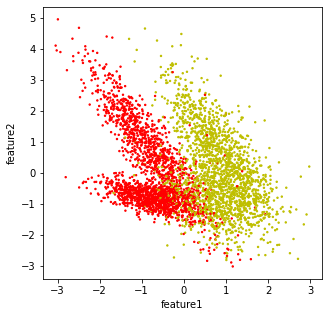

In [9]:
colors = np.where(df_train.label == -1, 'r', 'y')
df_train.plot(kind='scatter', x='feature1', y='feature2', c=colors, s=2, figsize=(5, 5))

In [10]:
weights,e,p = train_perceptron(df_train)
weights

1           0.096305
feature1    1.383040
feature2    0.372819
dtype: float64

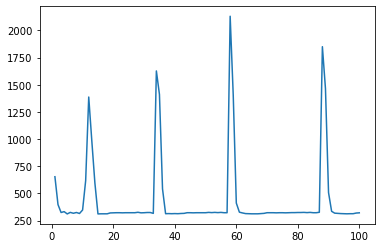

In [11]:
plt.plot(e[1:], p)

In [12]:
df_train.drop(['assigned_label','missclass'], axis=1,inplace=True)
df_train

,feature1,feature2,label,1
0,-0.586110,-0.974014,-1.0,1
1,-1.503634,-0.505257,-1.0,1
2,-1.280899,-0.152307,-1.0,1
3,-0.023598,-1.526080,-1.0,1
4,1.336478,-1.159745,1.0,1
...,...,...,...,...
3995,0.562388,0.725981,1.0,1
3996,-1.399836,1.311383,-1.0,1
3997,-0.041693,-1.372289,-1.0,1
3998,0.237685,0.396930,1.0,1


total =
4000
total_missclassed =
323
misclassed_ratio =
0.08075
correct_ratio =
0.91925


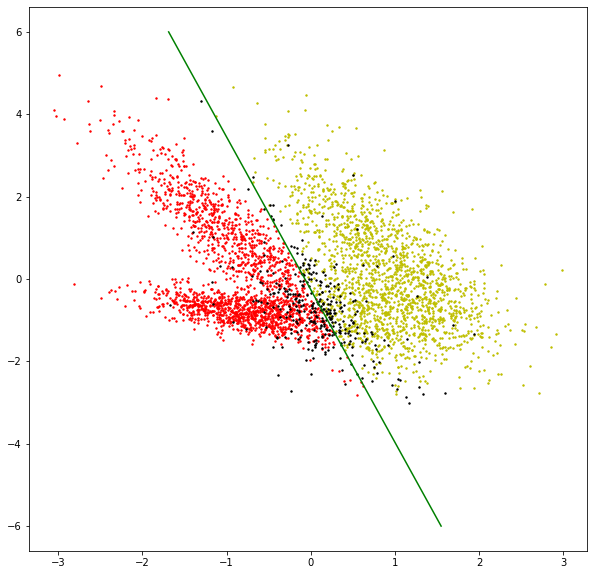

In [13]:
df_train['assigned_label'] = classify(df_train[['1','feature1','feature2']],weights)
find_missed(df_train)
measurments(df_train)
plot_result(df_train, weights)

In [14]:
df_test = pd.read_csv('test.csv')
df_test.loc[df_test['label'] == 0,'label'] = -1
df_test ['1'] = 1

total =
1000
total_missclassed =
73
misclassed_ratio =
0.073
correct_ratio =
0.927


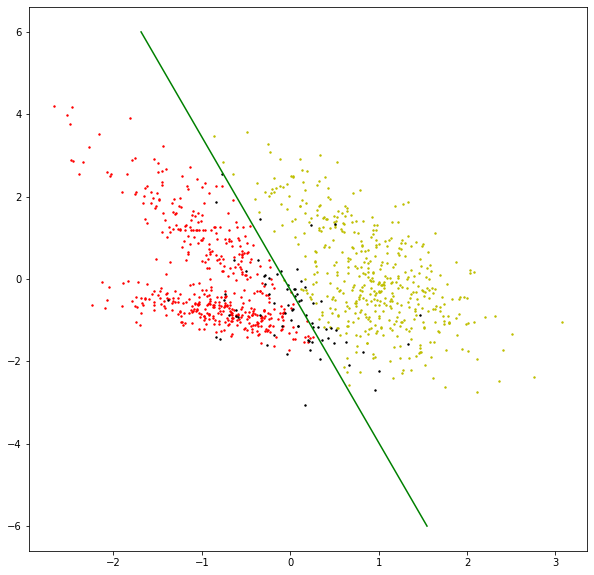

In [15]:
df_test['assigned_label'] = classify(df_test[['1','feature1','feature2']],weights)
find_missed(df_test)
measurments(df_test)
plot_result(df_test, weights)

# perceptron with LDA

In [16]:
def LDA(d):
    class1 = d.loc[d['label'] == 1,['feature1','feature2','label']]
    class2 = d.loc[d['label'] == -1,['feature1','feature2','label']]
    mu1 = class1.mean()
    mu2 = class2.mean()
    
    class1['x1-mu1'] = class1['feature1']-mu1[0]
    class1['x2-mu1'] = class1['feature2']-mu1[0]
    class1['x1-mu1 * x2-mu1'] = class1['x1-mu1']*class1['x2-mu1']
    class1['x1-mu1'] = class1['x1-mu1']**2
    class1['x2-mu1'] = class1['x2-mu1']**2
    s1 = class1.sum()
    s1 = np.matrix([[s1[3],s1[5]],[s1[5],s1[4]]])
    
    class2['x1-mu2'] = class2['feature1']-mu2[0]
    class2['x2-mu2'] = class2['feature2']-mu2[0]
    class2['x1-mu2 * x2-mu2'] = class2['x1-mu2']*class2['x2-mu2']
    class2['x1-mu2'] = class2['x1-mu2']**2
    class2['x2-mu2'] = class2['x2-mu2']**2
    s2 = class2.sum()
    s2 = np.matrix([[s2[3],s2[5]],[s2[5],s2[4]]])
    
    sw = s1+s2
    mu = np.matrix([[mu1[0]-mu2[0]],[mu1[1]-mu2[1]]])
    w = np.matmul(np. linalg. inv(sw),mu)
    w = w/np.linalg.norm(w)
    set_lda(d,w)
    return w

In [17]:
def set_lda(d,w):
    d['lda'] = float(w[0]) * d['feature1'] + float(w[1]) * d['feature1']
    return

In [18]:
def train_perceptron_LDA(d):
    eta = 0.001
    w = np.random.randn(2)
    missed = len(d.index)
    p = []
    e = [0]
    while (missed > 0 and e[-1] < 100):
        d['assigned_label'] = classify(d[['1','lda']],w)
        p.append(find_missed(d))
    
        missclassedxy = d.loc[d['missclass'], ['1','lda','label']]
        missclassedxy['lda'] = missclassedxy['lda'] * missclassedxy['label']
        missclassedxy['1'] = missclassedxy['1'] * missclassedxy['label']
        missclassedxy.drop(['label'], axis=1,inplace=True)
        
        w += eta*missclassedxy.sum(0)
        e.append(e[-1]+1)
    return w,e,p

In [19]:
df_train.drop(['assigned_label','missclass'], axis=1,inplace=True)

In [20]:
mu = df_train['feature1'].mean()
var = df_train['feature1'].var()
df_train['feature1'] = (df_train['feature1'] - mu)/math.sqrt(var)
mu = df_train['feature2'].mean()
var = df_train['feature2'].var()
df_train['feature2'] = (df_train['feature2'] - mu)/math.sqrt(var)

In [21]:
l = LDA(df_train)
l

matrix([[0.98342694],
        [0.18130485]])

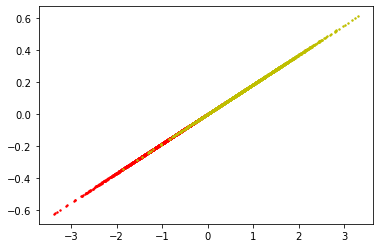

In [22]:
fig = plt.figure() 
ax = fig.add_subplot(111)
xr = [i*l[0] for i in df_train.loc[df_train['label'] == -1,'lda']]
yr = [i*l[1] for i in df_train.loc[df_train['label'] == -1,'lda']]
ax.scatter(xr,yr, s=2, c='r')
xy = [i*l[0] for i in df_train.loc[df_train['label'] == 1,'lda']]
yy = [i*l[1] for i in df_train.loc[df_train['label'] == 1,'lda']]
ax.scatter(xy,yy, s=2, c='y')
plt.show()

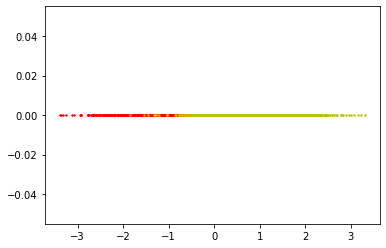

In [23]:
fig = plt.figure() 
ax = fig.add_subplot(111)
xr = [i*l[0] for i in df_train.loc[df_train['label'] == -1,'lda']]
ax.scatter(xr,[0]*len(xr), s=2, c='r')
xy = [i*l[0] for i in df_train.loc[df_train['label'] == 1,'lda']]
ax.scatter(xy,[0]*len(xy), s=2, c='y')
plt.show()

In [24]:
lda_weights,e,p = train_perceptron_LDA(df_train)
lda_weights

1     -0.006724
lda    1.456784
dtype: float64

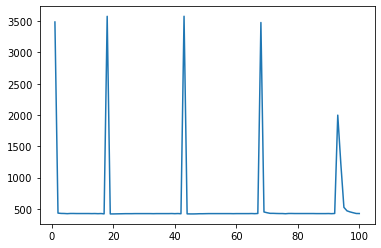

In [25]:
plt.plot(e[1:], p)

In [26]:
df_train.drop(['assigned_label','missclass'], axis=1,inplace=True)
df_train

,feature1,feature2,label,1,lda
0,-0.569722,-0.782083,-1.0,1,-0.663573
1,-1.459575,-0.409837,-1.0,1,-1.700013
2,-1.243557,-0.129554,-1.0,1,-1.448411
3,-0.024175,-1.220487,-1.0,1,-0.028157
4,1.294883,-0.929575,1.0,1,1.508191
...,...,...,...,...,...
3995,0.544139,0.567907,1.0,1,0.633776
3996,-1.358906,1.032783,-1.0,1,-1.582762
3997,-0.041724,-1.098359,-1.0,1,-0.048597
3998,0.229228,0.306603,1.0,1,0.266989


total =
4000
total_missclassed =
428
misclassed_ratio =
0.107
correct_ratio =
0.893


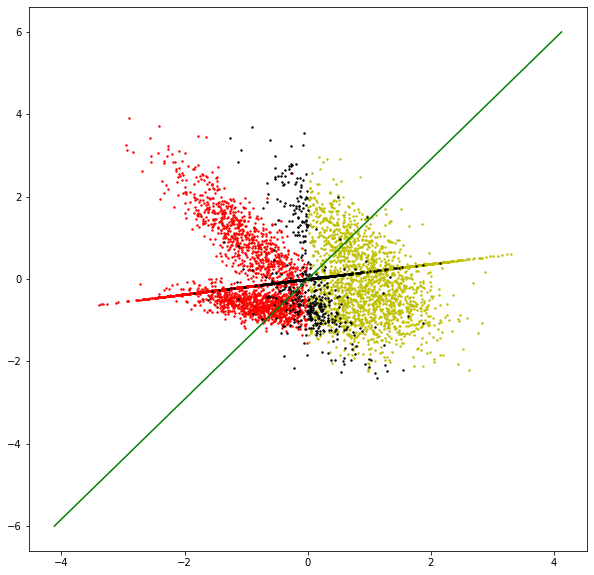

In [27]:
df_train['assigned_label'] = classify(df_train[['1','lda']],lda_weights)
find_missed(df_train)
measurments(df_train)
plot_result(df_train, lda_weights)

In [28]:
df_test['feature1'] = (df_test['feature1'] - mu)/math.sqrt(var)
mu = df_test['feature2'].mean()
var = df_test['feature2'].var()
df_test['feature2'] = (df_test['feature2'] - mu)/math.sqrt(var)

In [29]:
set_lda(df_test,l)

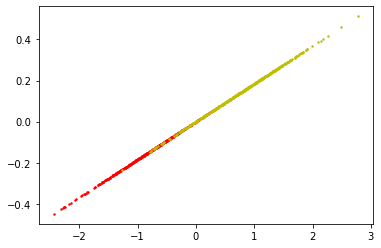

In [30]:
fig = plt.figure() 
ax = fig.add_subplot(111)
xr = [i*l[0] for i in df_test.loc[df_test['label'] == -1,'lda']]
yr = [i*l[1] for i in df_test.loc[df_test['label'] == -1,'lda']]
ax.scatter(xr,yr, s=2, c='r')
xy = [i*l[0] for i in df_test.loc[df_test['label'] == 1,'lda']]
yy = [i*l[1] for i in df_test.loc[df_test['label'] == 1,'lda']]
ax.scatter(xy,yy, s=2, c='y')
plt.show()

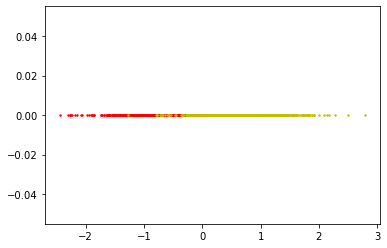

In [31]:
fig = plt.figure() 
ax = fig.add_subplot(111)
xr = [i*l[0] for i in df_test.loc[df_test['label'] == -1,'lda']]
ax.scatter(xr,[0]*len(xr), s=2, c='r')
xy = [i*l[0] for i in df_test.loc[df_test['label'] == 1,'lda']]
ax.scatter(xy,[0]*len(xy), s=2, c='y')
plt.show()

total =
1000
total_missclassed =
99
misclassed_ratio =
0.099
correct_ratio =
0.901


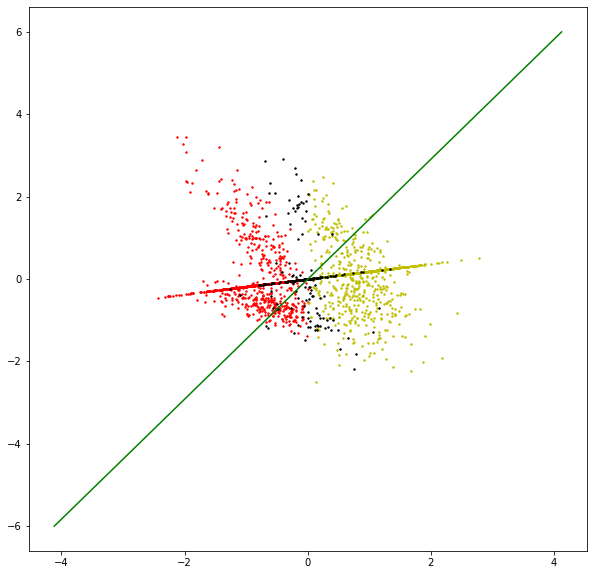

In [32]:
df_test['assigned_label'] = classify(df_test[['1','lda']],lda_weights)
find_missed(df_test)
measurments(df_test)
plot_result(df_test, lda_weights)